In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 🐼 Exploratory Analysis - Coding Challenge
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- recommended for education and development
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [59]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

In [60]:
movies.shape

(9742, 3)

In [61]:
ratings.shape

(100836, 4)

In [62]:
ratings.sample(5)

,userId,movieId,rating,timestamp
33735,230,2,2.5,1196305107
58151,381,733,3.5,1164877294
41159,279,57368,3.0,1506394267
93816,599,4133,1.5,1519149718
84593,543,72998,5.0,1408809384


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [63]:
ratings['userId'].nunique(), ratings['movieId'].nunique()

(610, 9724)

#### What is the average rating

In [64]:
ratings['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [65]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

<AxesSubplot:>

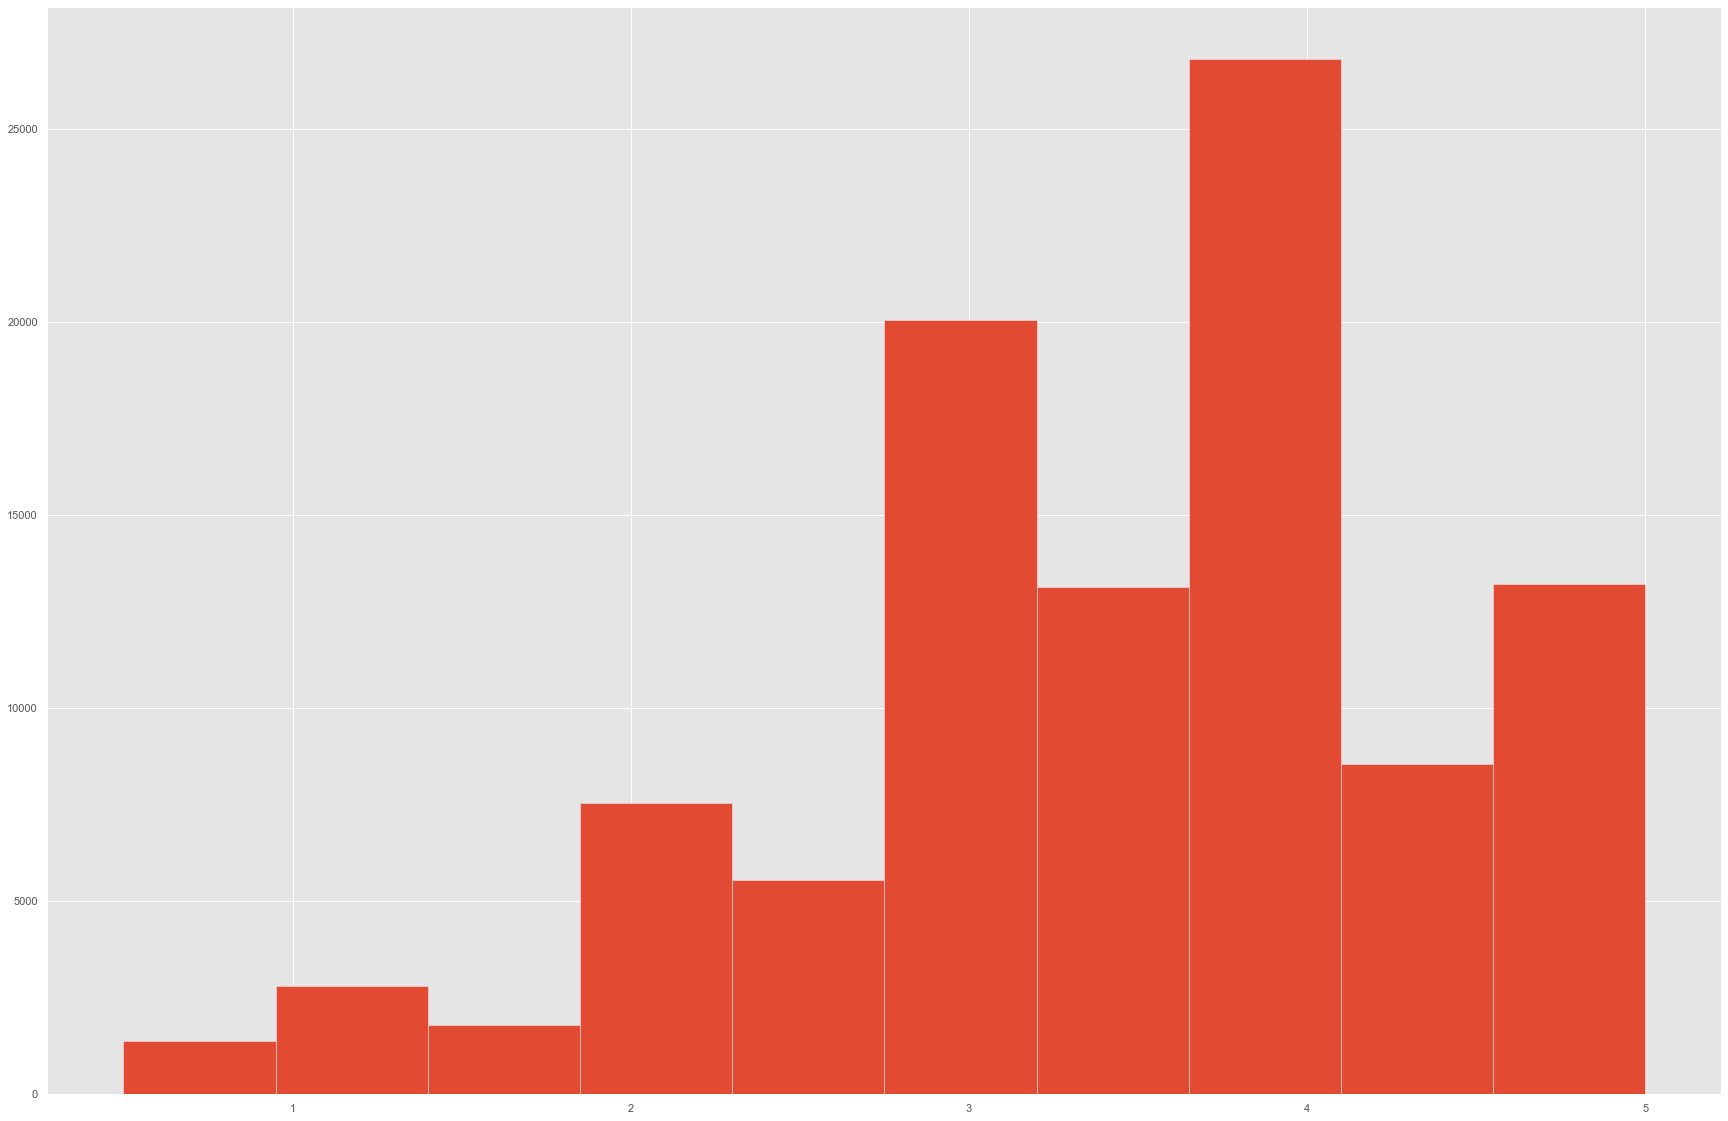

In [66]:
ratings['rating'].hist()

**Frequency table**

In [67]:
ftable = pd.crosstab(index=ratings['rating'], columns='rating'.count)
ftable

col_0,<built-in method count of str object at 0x7fe0202e3f30>
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [68]:
rel_freq = ratings['rating'].value_counts()
rel_freq = pd.DataFrame(rel_freq)
rel_freq = rel_freq.reset_index()
rel_freq.rename(columns = {'index' : 'Movie rating', 'rating' : 'Relative Freq'}, inplace = True)
rel_freq

,Movie rating,Relative Freq
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


In [69]:
five_rating=ratings.loc[ratings['rating'] == 5]
five_rating.head(5)

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [70]:
five_star_rating=five_rating['rating'].count()
five_star_rating

13211

In [71]:
total_rating = ratings['rating'].count()
total_rating

100836

In [72]:
five_star_percent=float([five_star_rating*100]//total_rating)
five_star_percent

13.0

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [73]:
rating_user = ratings.groupby('userId').count()
rating_user

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


- How many users have rated more than 20 movies?

In [74]:
rating_20 = rating_user.loc[rating_user['rating'] > 20].count()
rating_20

movieId      596
rating       596
timestamp    596
dtype: int64

- How many movies rated the user with the most/ least ratings?

In [18]:
rating_user['rating'].max()

2698

In [19]:
rating_user['rating'].min()

20

-  What is the *median* number of ratings?

In [20]:
rating_user['rating'].median()

70.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

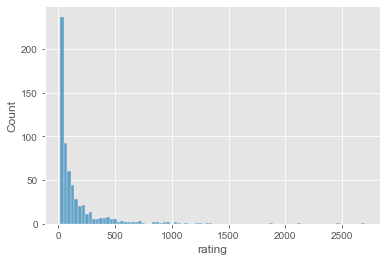

In [21]:
sns.histplot(data=rating_user, x='rating')
sns.set(rc={'figure.figsize':(30,20)})

The distribution is skewed to the right.

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [22]:
avg_rating = ratings.groupby('userId').mean()
avg_rating

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


- Which user gave the worst ratings on average, which user gave the best ratings?

In [23]:
avg_rating = avg_rating.reset_index()

In [24]:
avg_rating

,userId,movieId,rating,timestamp
0,1,1854.603448,4.366379,9.649856e+08
1,2,70350.275862,3.948276,1.445715e+09
2,3,7058.384615,2.435897,1.306464e+09
3,4,1982.129630,3.555556,9.658643e+08
4,5,343.840909,3.636364,8.474351e+08
...,...,...,...,...
605,606,9692.197309,3.657399,1.179512e+09
606,607,1860.636364,3.786096,9.647841e+08
607,608,4502.605295,3.134176,1.122668e+09
608,609,483.162162,3.270270,8.472210e+08


In [25]:
avg_rating['rating'].min()

1.275

In [26]:
avg_rating['rating'].max()

5.0

In [27]:
avg_rating[avg_rating['rating'] == 1.275]

,userId,movieId,rating,timestamp
441,442,2160.45,1.275,1.331561e+09


In [28]:
avg_rating[avg_rating['rating'] == 5.0]

,userId,movieId,rating,timestamp
52,53,1343.25,5.0,1.237748e+09


- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

- Plot the distribution of average ratings! How would you characterize the distribution?

<AxesSubplot:>

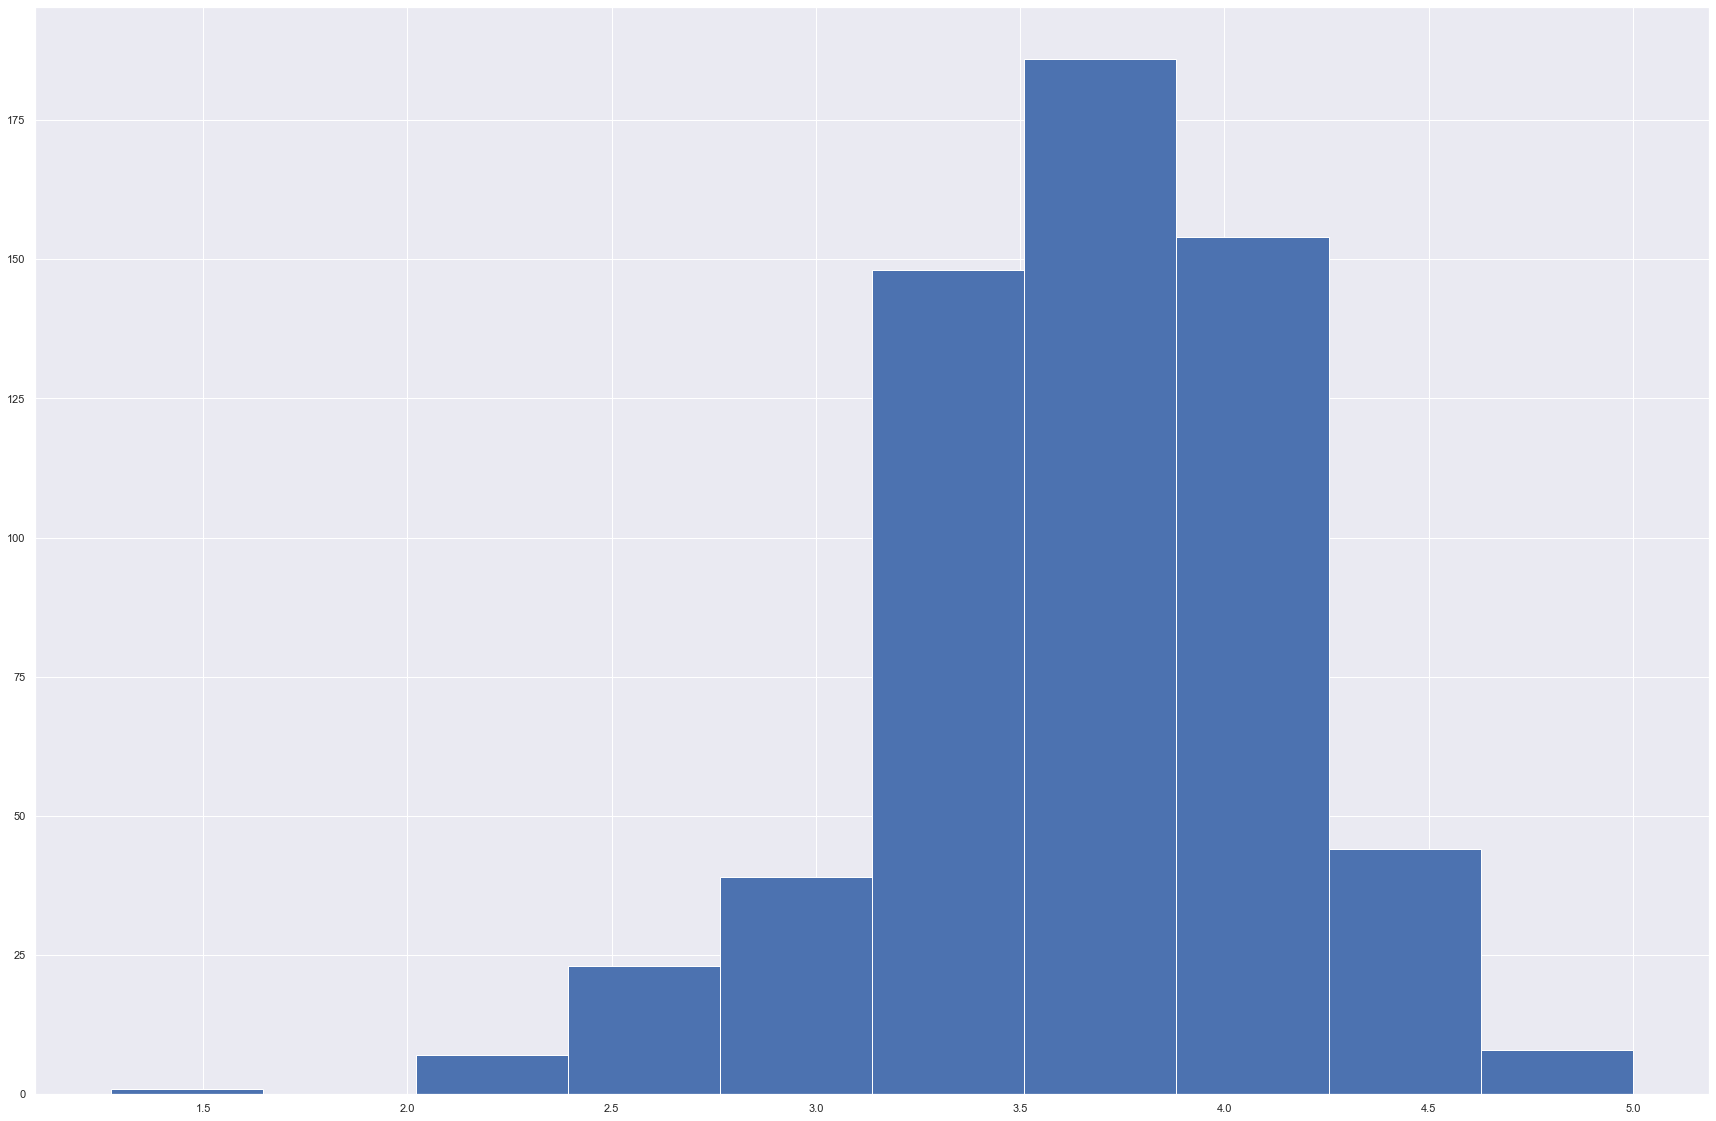

In [29]:
avg_rating['rating'].hist()

The distribution looks like a normal (gaussian) distribution

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [30]:
rating_user = ratings.groupby('userId').count()
rating_user

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [31]:
rating_user = rating_user.rename(columns={'rating':'number_ratings'})
rating_user

,movieId,number_ratings,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


In [32]:
rating_user = rating_user.reset_index()
rating_user

,userId,movieId,number_ratings,timestamp
0,1,232,232,232
1,2,29,29,29
2,3,39,39,39
3,4,216,216,216
4,5,44,44,44
...,...,...,...,...
605,606,1115,1115,1115
606,607,187,187,187
607,608,831,831,831
608,609,37,37,37


In [33]:
ratings_overview = pd.concat([avg_rating, rating_user], axis=1)

In [34]:
ratings_overview.drop(['userId', 'movieId', 'timestamp', 'userId', 'movieId', 'timestamp'], axis=1, inplace=True)

In [35]:
ratings_overview = ratings_overview[ratings_overview['number_ratings'] > 10]

In [36]:
ratings_overview

,rating,number_ratings
0,4.366379,232
1,3.948276,29
2,2.435897,39
3,3.555556,216
4,3.636364,44
...,...,...
605,3.657399,1115
606,3.786096,187
607,3.134176,831
608,3.270270,37


<AxesSubplot:xlabel='rating', ylabel='number_ratings'>

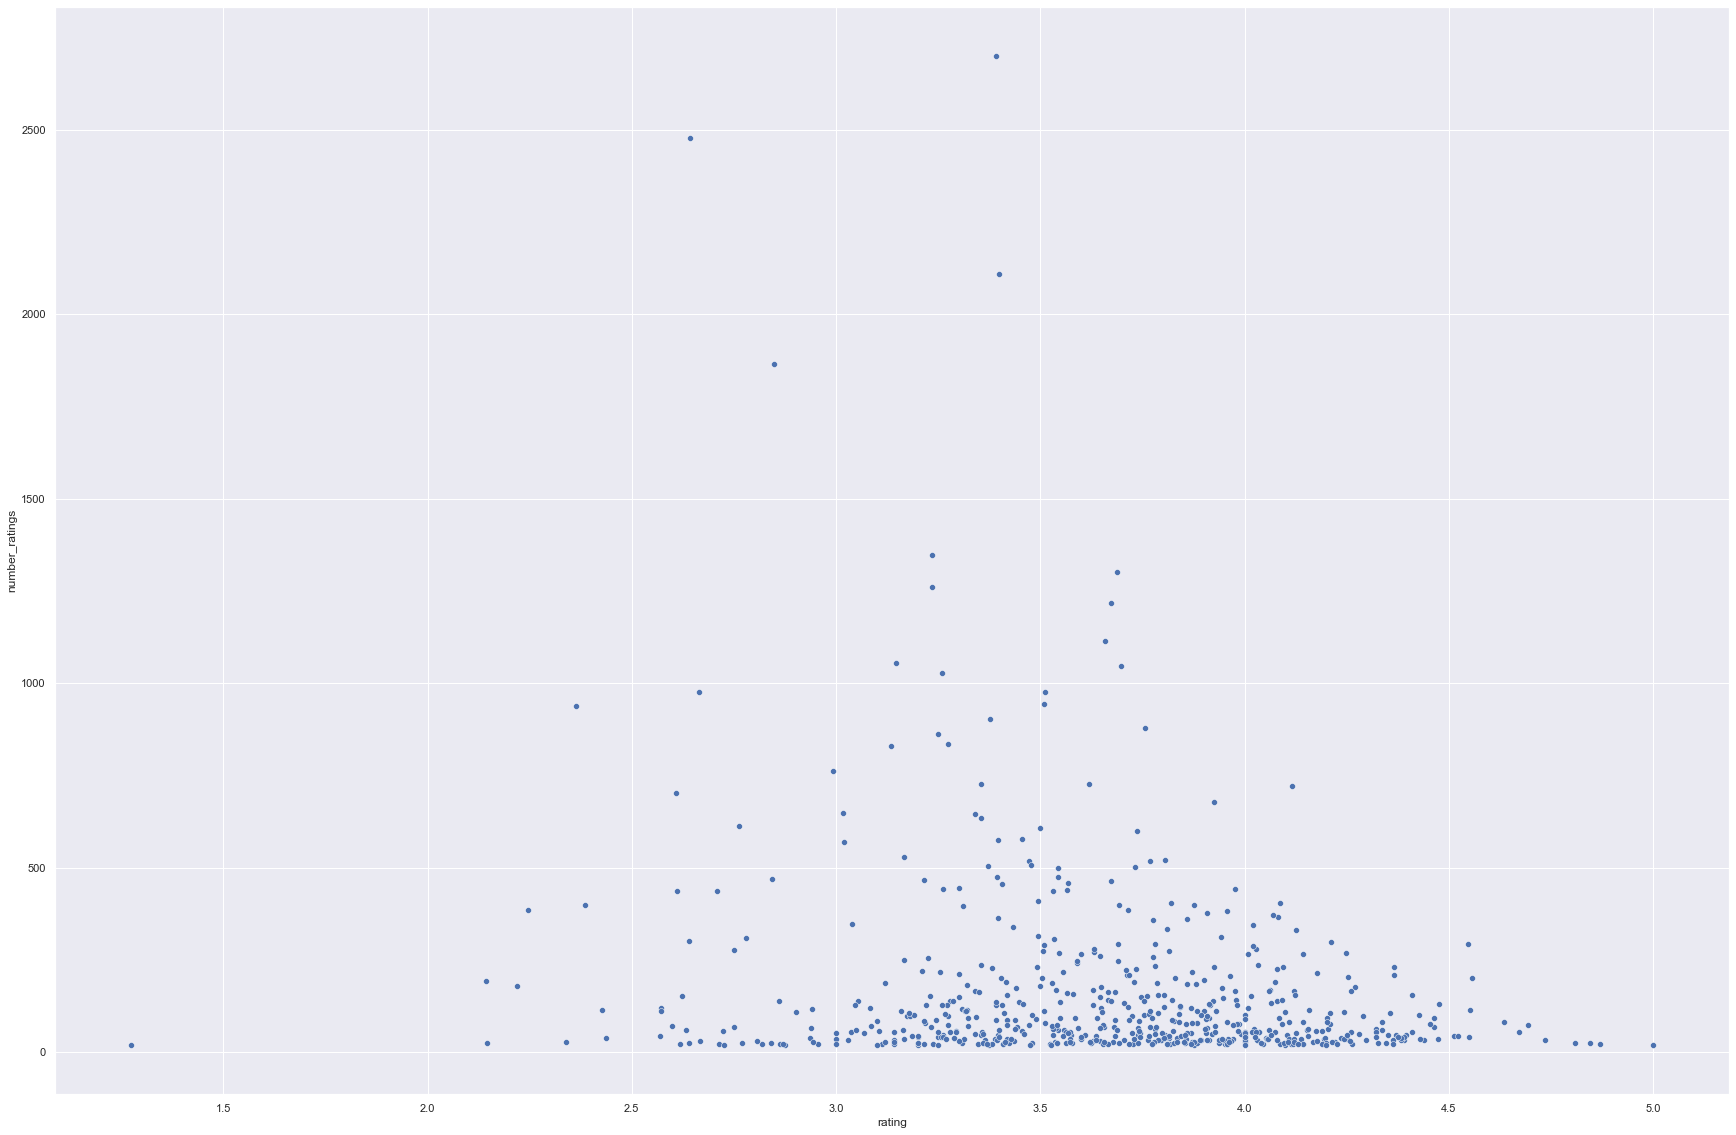

In [37]:
sns.scatterplot(data=ratings_overview, x='rating', y='number_ratings')

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [38]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
movies['title'].duplicated().sum()

5

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [75]:
(~movies['movieId'].isin(ratings['movieId'])).sum()

18

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [41]:
movies['title'].str.extract('\((\d{4})\)')

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

---
## Fuzzy String Search

#### Search for "star wars" movies in the items table

- install the library [thefuzz](https://github.com/seatgeek/thefuzz)
- search for the query "star wars" in the list of movie titles
    - set the `movieId` as index for the dataframe
    - extract the `titles` column and use it as input to `extractBests()`
- look at the following code snippet and research:
    - what is the third entry in the tuples returned?
    - what is the second entry in the tuples returned?

In [42]:
from thefuzz import fuzz, process

things = {"B": "banana", 2: "bananabred", "bb": "beans", "K": "kiwis", "A": "apples"}
search_query = "bananaa"
match = process.extractBests(
    search_query, things, scorer=fuzz.token_set_ratio
)
match

ModuleNotFoundError: No module named 'thefuzz'

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

---
#### Count the number of ratings per movie title!

- What are the top 10 most rated movies in the dataset?

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Look at the top 10 movies that have the highest coefficient of variation!
 

---

#### Calculate the average rating per movie title!

- Make a visualization of the distribution of average ratings per movie

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!